In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from myconfig import mypara

In [2]:
adr_oridata = "../data/GODAS_up150m_temp_nino_tauxy_1980_2021_kb.nc"
data_ori = xr.open_dataset(adr_oridata)
temp_ori_region = data_ori["temperatureNor"][
    :,
    mypara.lev_range[0] : mypara.lev_range[1],
    mypara.lat_range[0] : mypara.lat_range[1],
    mypara.lon_range[0] : mypara.lon_range[1],
].values

In [3]:
(2021 - 1980 + 1) * 12

504

In [4]:
data_ori

<xarray.Dataset>
Dimensions:         (n_mon: 504, lev: 8, lat: 51, lon: 179)
Coordinates:
  * lon             (lon) float64 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * lat             (lat) float64 -20.0 -19.0 -18.0 -17.0 ... 18.0 19.0 20.0
  * lev             (lev) float64 0.0 5.0 20.0 40.0 60.0 90.0 120.0 150.0
Dimensions without coordinates: n_mon
Data variables:
    temperatureNor  (n_mon, lev, lat, lon) float64 ...
    nino34          (n_mon) float64 ...
    nino3           (n_mon) float64 ...
    nino4           (n_mon) float64 ...
    tauxNor         (n_mon, lat, lon) float64 ...
    tauyNor         (n_mon, lat, lon) float64 ...
    stdtemp         (lev, lat, lon) float64 ...
    stdtaux         (lat, lon) float64 ...
    stdtauy         (lat, lon) float64 ...

In [5]:
stdtemp = data_ori["stdtemp"][mypara.lev_range[0] : mypara.lev_range[1]].values
stdtemp = np.nanmean(stdtemp, axis=(1, 2))
stdtaux = data_ori["stdtaux"].values
stdtaux = np.nanmean(stdtaux, axis=(0, 1))
stdtauy = data_ori["stdtauy"].values
stdtauy = np.nanmean(stdtauy, axis=(0, 1))
stds = np.concatenate((stdtaux[None], stdtauy[None], stdtemp), axis=0)
stds.shape

(9,)

In [26]:
# free_run = np.load("../data/free_run_ls1_noise.npy") # 0.5 guassian noise
# free_run = np.load("../data/free_run_ls1_noise1.npy") # 1 guassian noise
free_run = np.load("../data/free_run_2_switch_drop_0.5.npy")  # change order


In [27]:
free_run.shape

(2160, 1, 1, 9, 51, 120)

In [28]:
free_run_unit = free_run * stds[:, None, None]

In [29]:
# temp_ori_region
data_ori

<xarray.Dataset>
Dimensions:         (n_mon: 504, lev: 8, lat: 51, lon: 179)
Coordinates:
  * lon             (lon) float64 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * lat             (lat) float64 -20.0 -19.0 -18.0 -17.0 ... 18.0 19.0 20.0
  * lev             (lev) float64 0.0 5.0 20.0 40.0 60.0 90.0 120.0 150.0
Dimensions without coordinates: n_mon
Data variables:
    temperatureNor  (n_mon, lev, lat, lon) float64 ...
    nino34          (n_mon) float64 ...
    nino3           (n_mon) float64 ...
    nino4           (n_mon) float64 ...
    tauxNor         (n_mon, lat, lon) float64 ...
    tauyNor         (n_mon, lat, lon) float64 ...
    stdtemp         (lev, lat, lon) float64 ...
    stdtaux         (lat, lon) float64 0.01321 0.01258 0.01171 ... nan nan nan
    stdtauy         (lat, lon) float64 0.0112 0.01267 0.01498 ... nan nan nan

In [30]:
free_run_unit1 = xr.DataArray(
    free_run_unit[:,0],
    dims = ['time','pre','lev','lat','lon' ],
    coords = {
        'time':np.arange(0,720*3),
        'pre':np.arange(0,1),
        'lev': np.arange(0,9),
        'lat':data_ori.lat.values[mypara.lat_range[0] : mypara.lat_range[1]],
        'lon':data_ori.lon.values[mypara.lon_range[0] : mypara.lon_range[1]],
    }
)
free_run_unit2 = xr.Dataset({"var":free_run_unit1})
# free_run_unit2.to_netcdf("../data/free_run_unit.nc")

In [31]:
free_run_unit1

<xarray.DataArray (time: 2160, pre: 1, lev: 9, lat: 51, lon: 120)>
array([[[[[ 7.48852301e-03,  8.43541328e-03,  9.72781121e-03, ...,
            1.46150959e-02,  1.41102643e-02,  1.35810838e-02],
          [ 6.05090491e-03,  6.53061457e-03,  7.84246086e-03, ...,
            1.36430418e-02,  1.31021451e-02,  1.26370993e-02],
          [ 5.02601069e-03,  5.42426799e-03,  6.00314675e-03, ...,
            1.22115122e-02,  1.17877850e-02,  1.13835240e-02],
          ...,
          [ 6.42839610e-03,  6.51876202e-03,  7.15556739e-03, ...,
            1.09377921e-02,  1.08624001e-02,  1.02220130e-02],
          [ 8.91843391e-03,  8.98351997e-03,  9.59506900e-03, ...,
            9.58733625e-03,  9.46083582e-03,  8.23834990e-03],
          [ 1.09906347e-02,  1.11876087e-02,  1.16748156e-02, ...,
            8.83492803e-03,  7.48903089e-03,  6.21560563e-03]],

         [[-8.54871809e-03, -8.65810863e-03, -7.32469849e-03, ...,
           -1.41167597e-03, -6.02645306e-04, -2.05272942e-04],
          [-9.53649913e-03, -9.31031122e-03, -7.54438790e-03, ...,
           -1.17383287e-03, -2.83149751e-04, -4.77042732e-05],
          [-9.52825724e-03, -8.74293815e-03, -6.94514782e-03, ...,
           -8.49711885e-04, -1.25517493e-04,  1.45867903e-04],
...
          [-2.35502728e-01,  1.27947919e-01,  1.24743228e-01, ...,
            3.75441042e-01,  5.12663292e-01,  1.01920858e+00],
          [-3.50832986e-01,  1.46581462e-01,  1.12701960e-01, ...,
            9.38413618e-02,  1.26136921e-01,  6.43392593e-01],
          [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
            0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

         [[-2.59140061e-01, -8.46212110e-02, -1.95656900e-01, ...,
           -5.89161832e-01, -5.39151627e-01, -1.45595891e-01],
          [-4.02769336e-01, -3.66612673e-01, -2.85574839e-01, ...,
           -8.57502272e-01, -7.07641279e-01, -5.85950504e-01],
          [-7.20832803e-01, -5.03570837e-01, -7.00875077e-01, ...,
           -1.17208476e+00, -8.61745877e-01, -9.98330566e-01],
          ...,
          [-1.56266456e-01,  2.04069290e-01,  1.89253423e-01, ...,
           -7.36571970e-01, -6.04140041e-01, -7.70351521e-02],
          [-2.62648330e-01,  2.45752051e-01,  2.10796027e-01, ...,
           -8.25651647e-01, -8.07941013e-01, -2.98456868e-01],
          [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
            0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]]]])
Coordinates:
  * time     (time) int64 0 1 2 3 4 5 6 7 ... 2153 2154 2155 2156 2157 2158 2159
  * pre      (pre) int64 0
  * lev      (lev) int64 0 1 2 3 4 5 6 7 8
  * lat      (lat) float64 -20.0 -19.0 -18.0 -17.0 -16.0 ... 17.0 18.0 19.0 20.0
  * lon      (lon) float64 92.0 94.0 96.0 98.0 100.0 ... 324.0 326.0 328.0 330.0

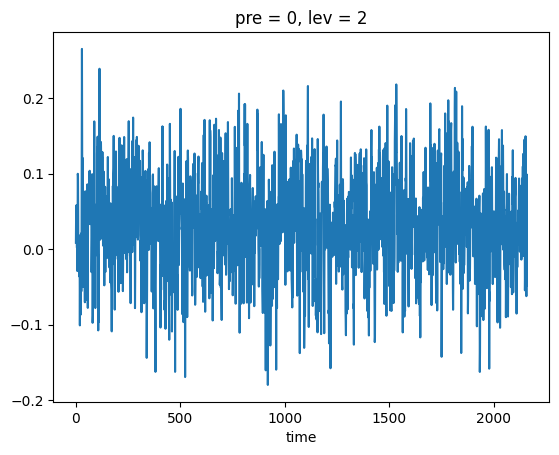

In [32]:
Nino34 = free_run_unit1.loc[:,:,2,-5:5,190:240].mean(dim=['lat','lon'])
# Nino34[:130].plot()
Nino34[:,0].plot()

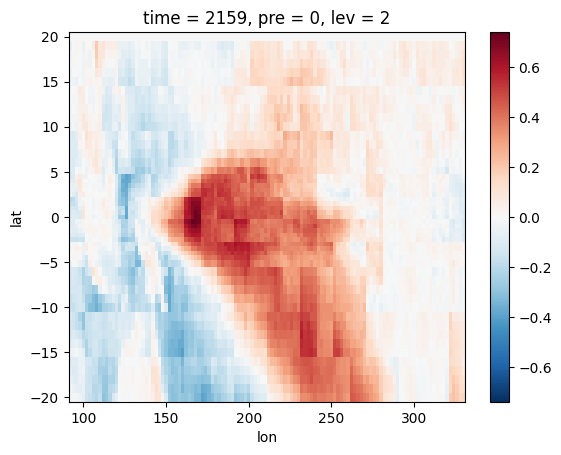

In [25]:
free_run_unit1[-1,0,2].plot()